In [1]:
! mkdir ~/.kaggle

In [2]:
! cp /content/drive/MyDrive/kaggle_api/kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d uciml/default-of-credit-card-clients-dataset

  0% 0.00/0.98M [00:00<?, ?B/s]
100% 0.98M/0.98M [00:00<00:00, 108MB/s]


In [5]:
!unzip /content/default-of-credit-card-clients-dataset.zip

Archive:  /content/default-of-credit-card-clients-dataset.zip
  inflating: UCI_Credit_Card.csv     


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
df=pd.read_csv('/content/UCI_Credit_Card.csv')
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [10]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

Text(0.5, 1.0, 'asgheibneflag')

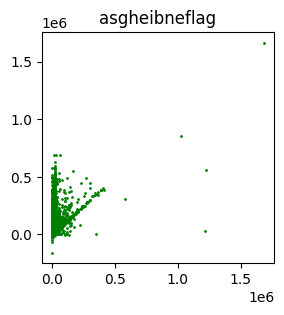

In [13]:
plt.figure(figsize=(3,3))
plt.scatter(x=df.PAY_AMT2,y=df.BILL_AMT3,c='g',s=1)
plt.title('asgheibneflag')

<Axes: xlabel='default.payment.next.month', ylabel='count'>

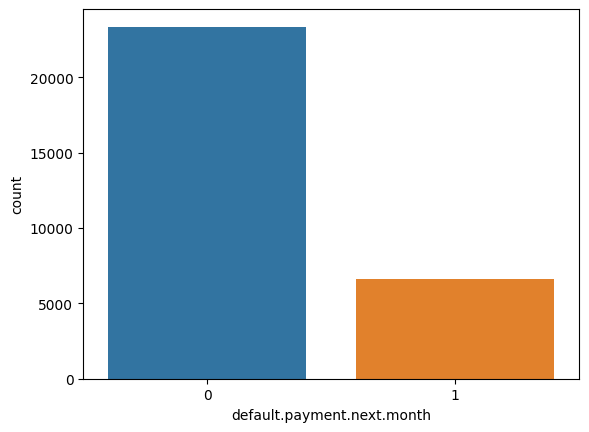

In [14]:
sns.countplot(data=df,x='default.payment.next.month')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


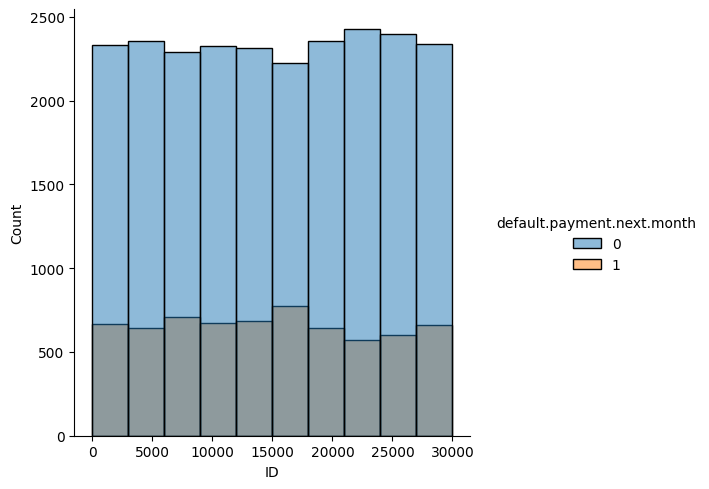

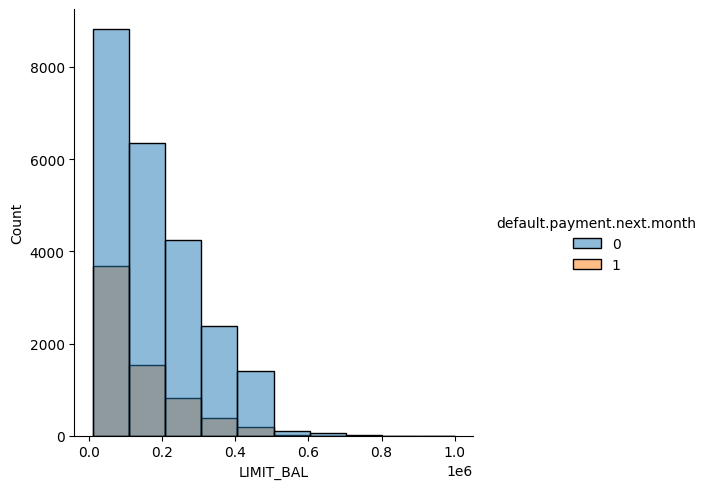

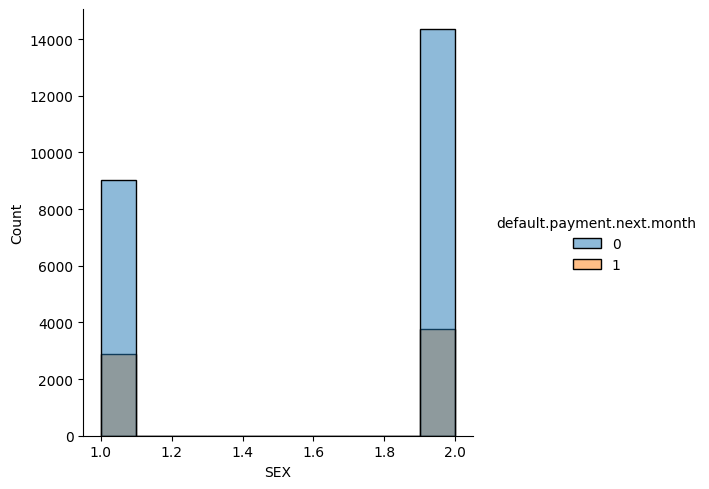

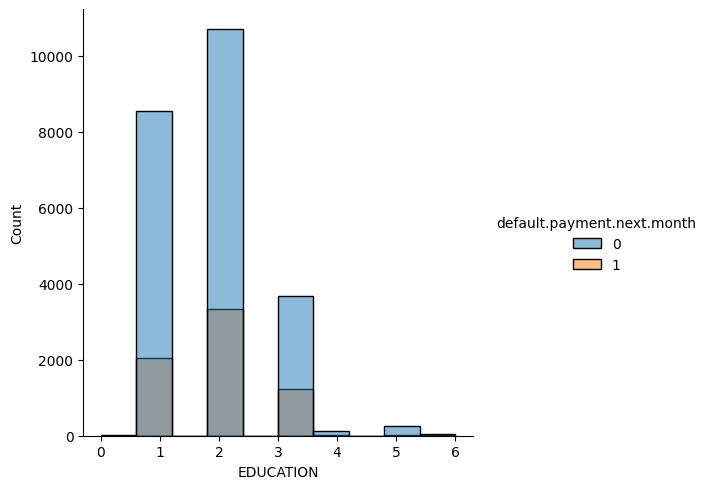

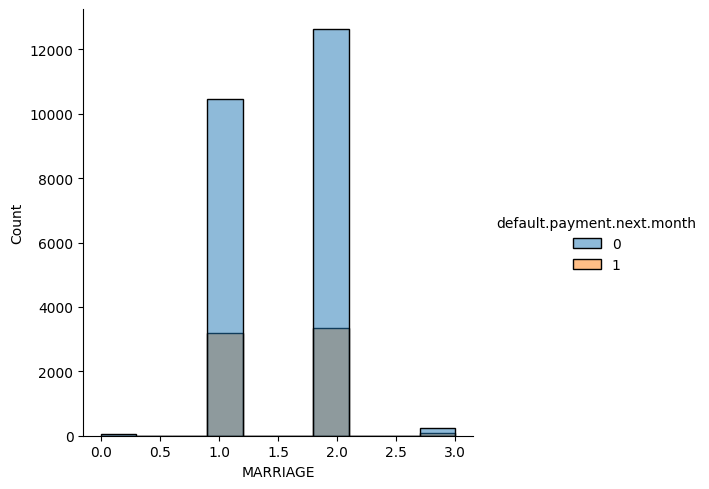

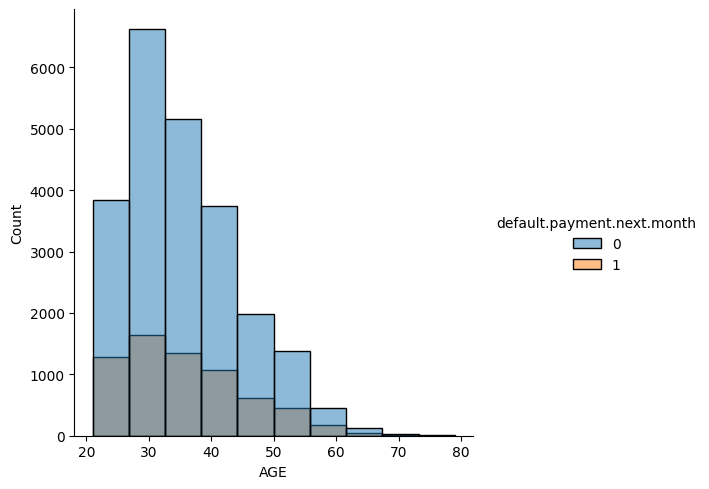

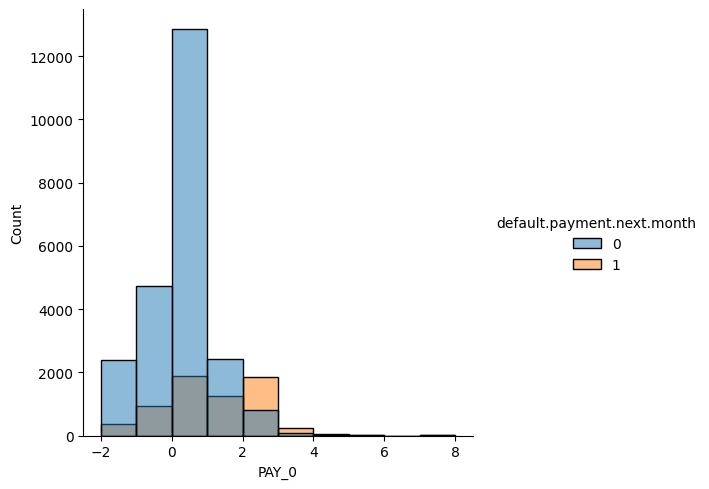

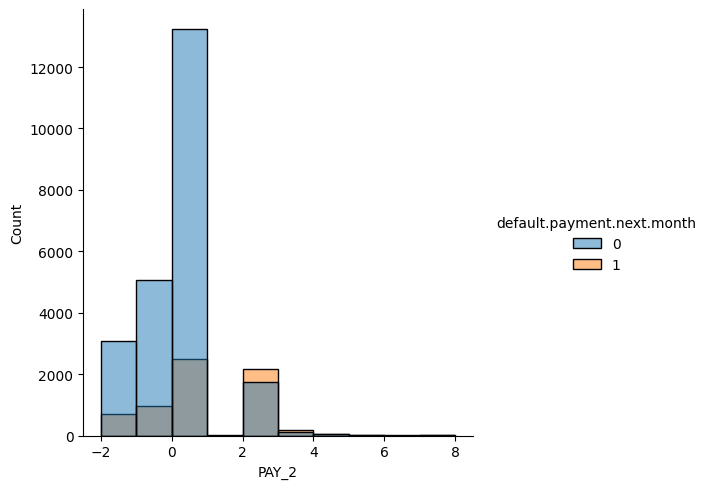

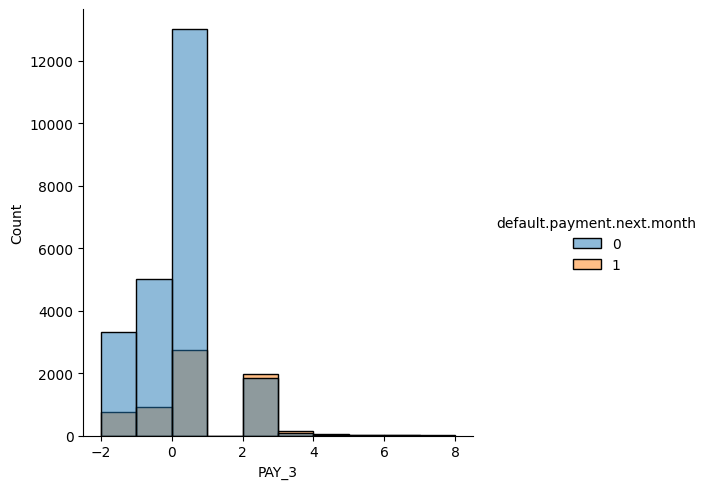

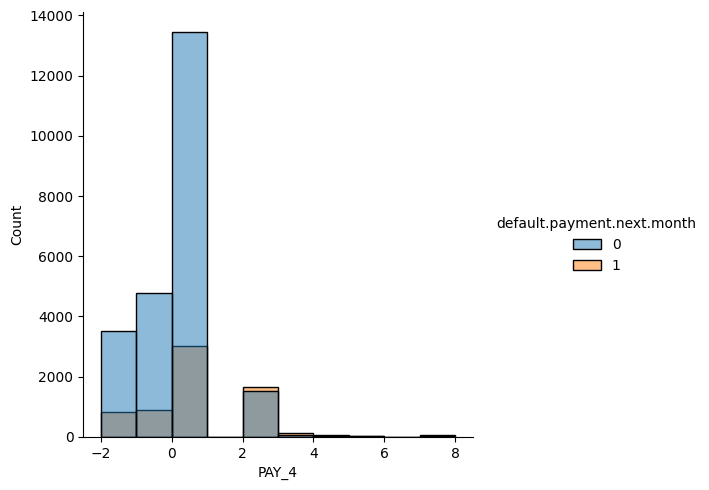

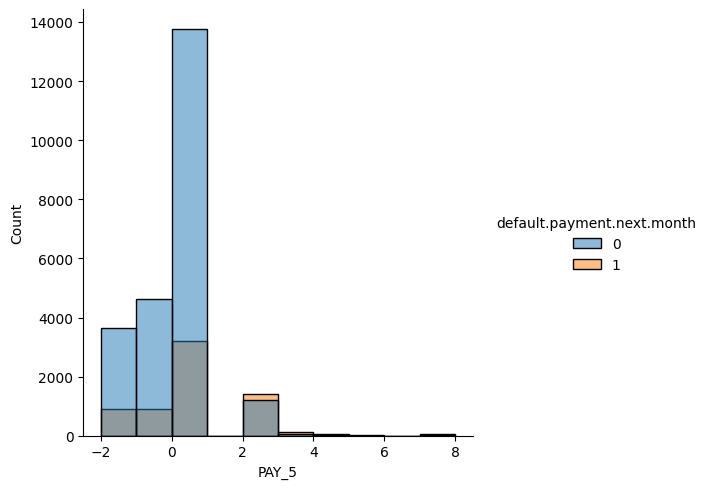

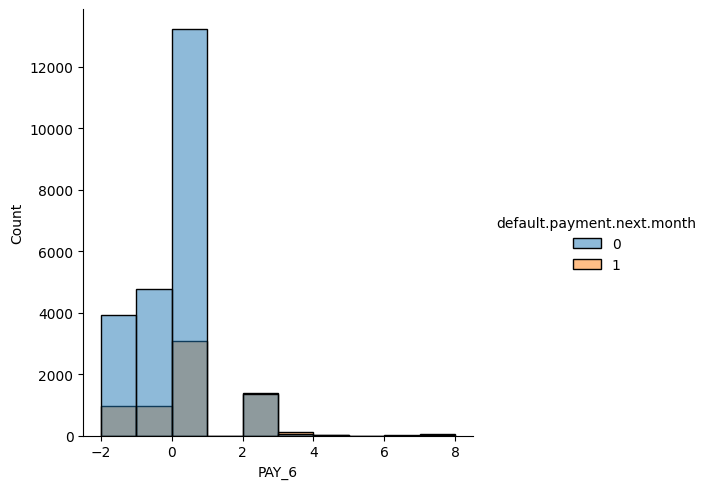

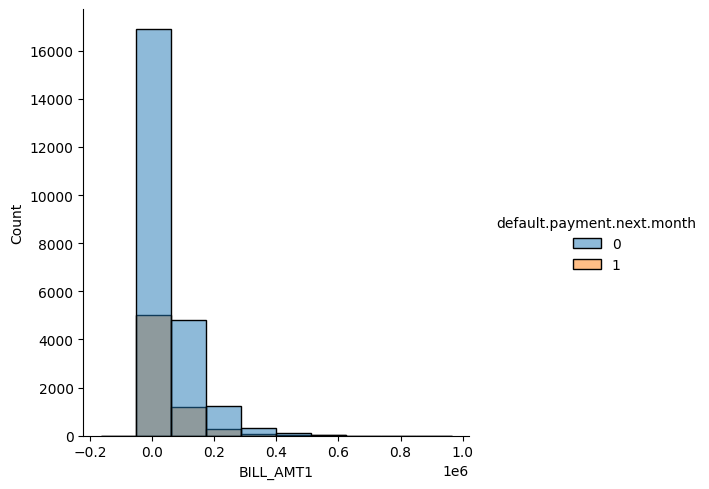

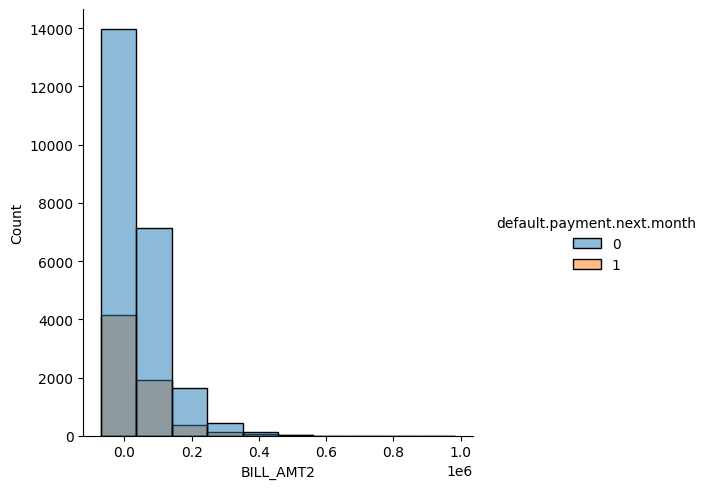

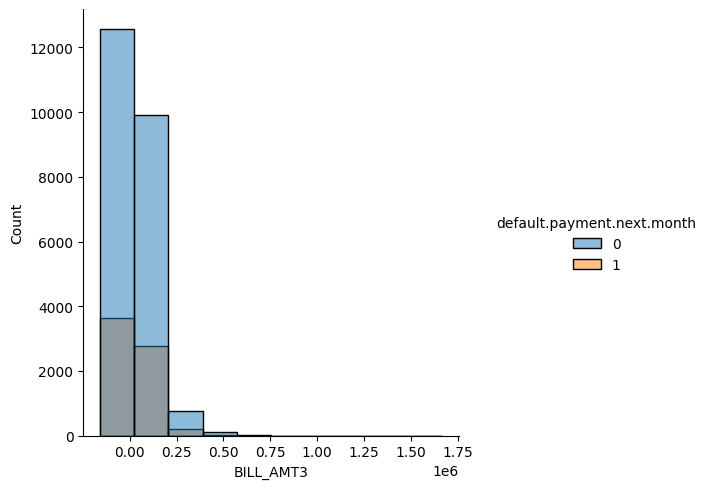

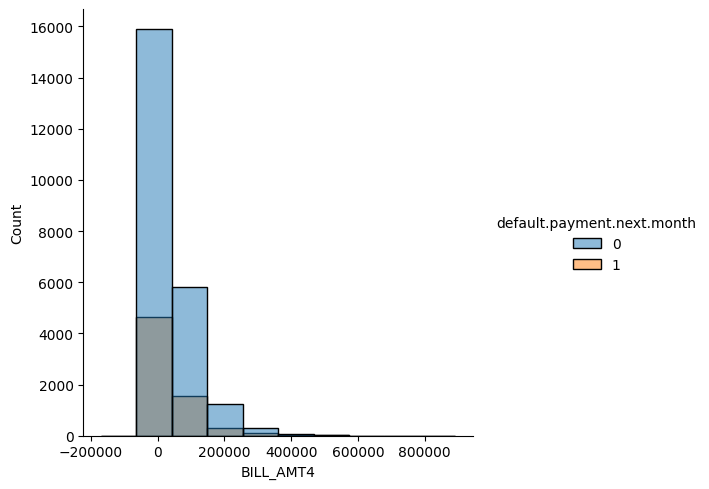

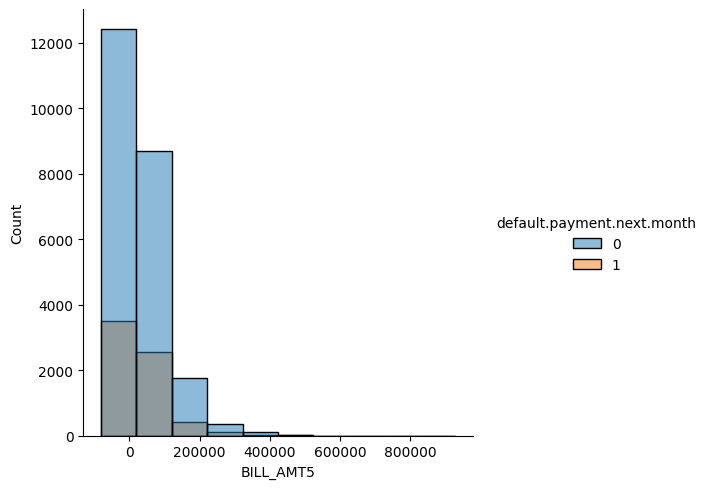

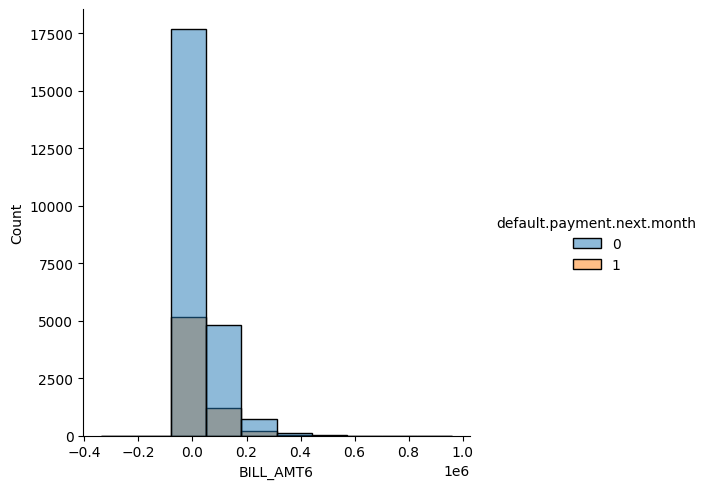

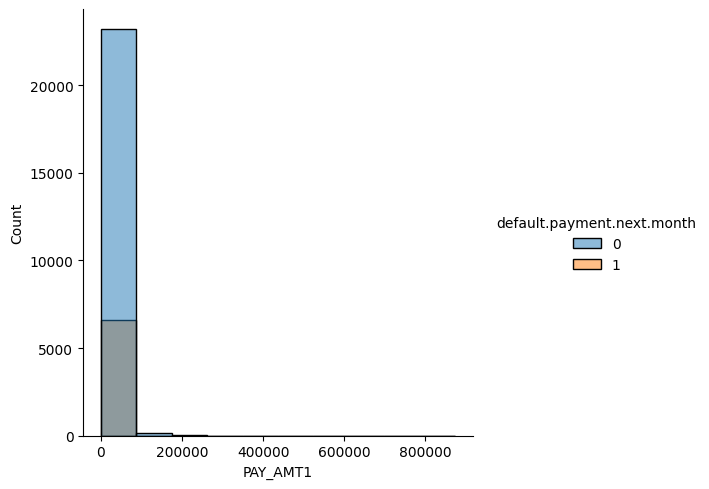

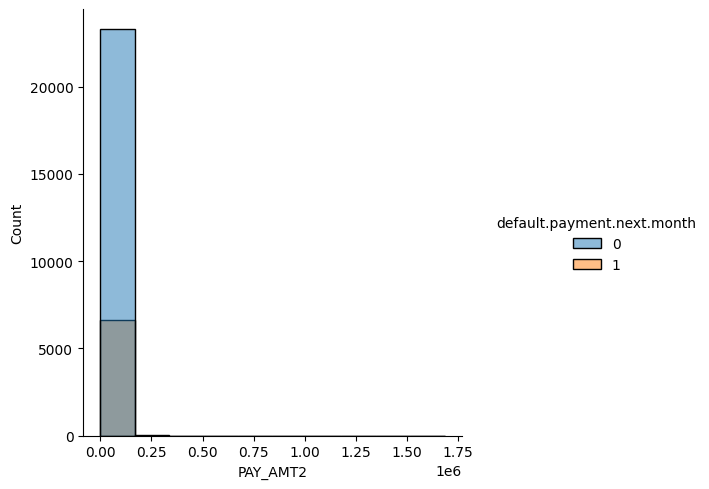

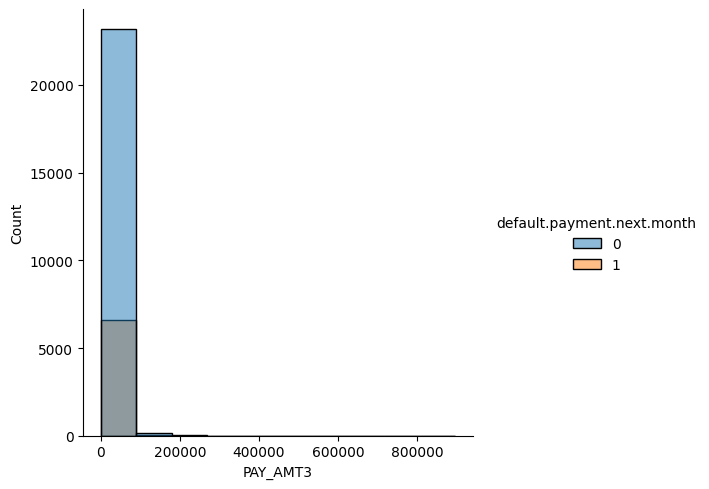

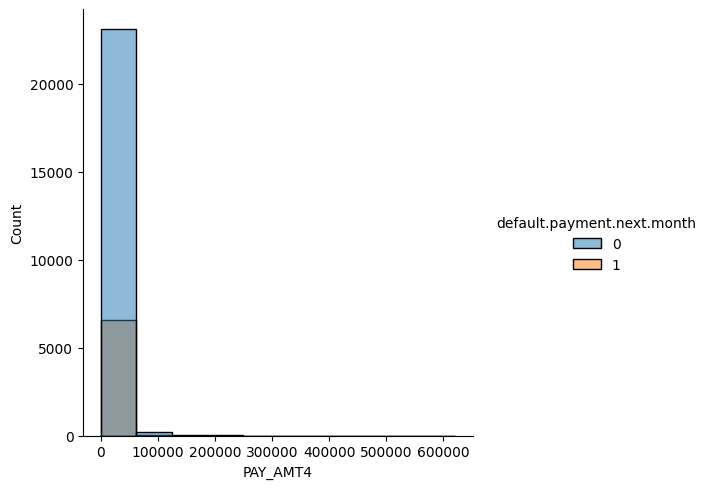

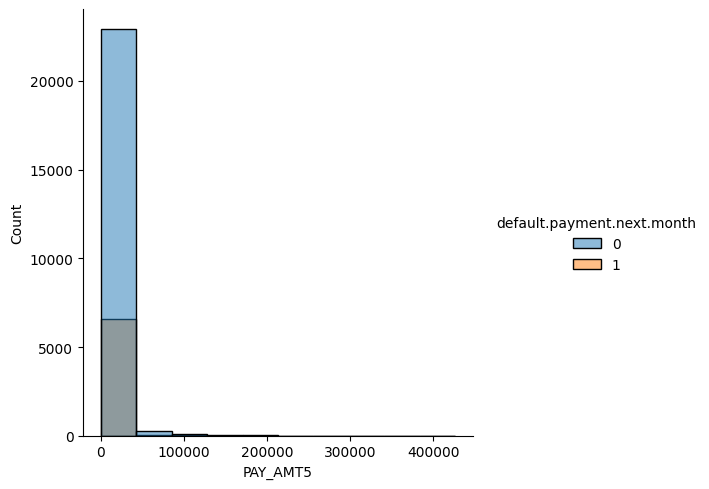

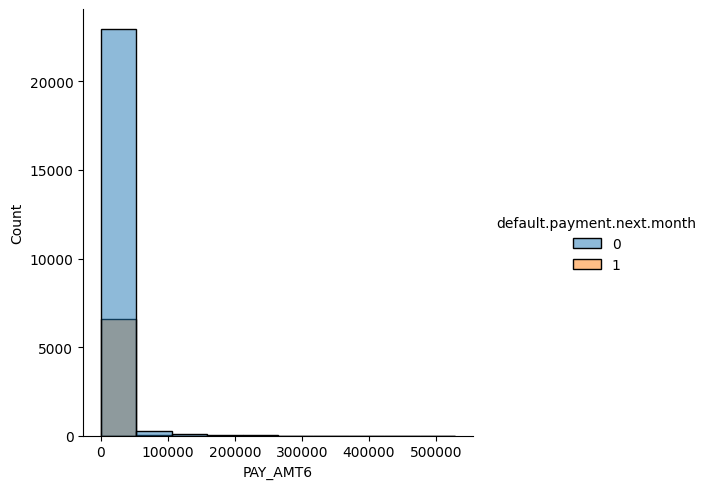

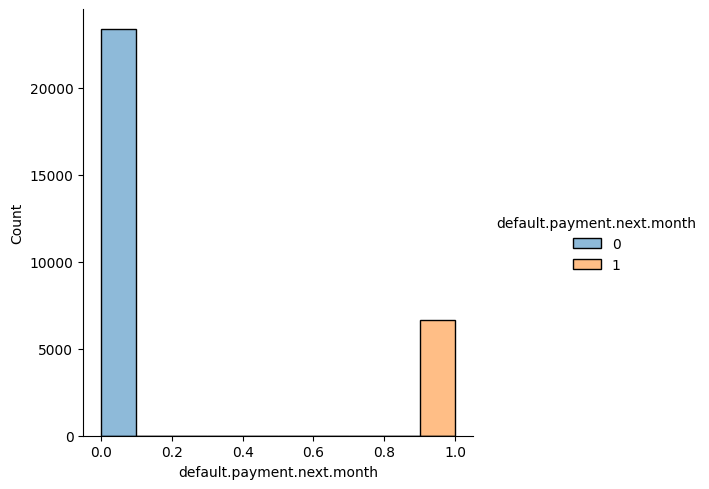

In [15]:
# fig, ax = plt.subplots(figsize=(10, 5))
for i in df.columns:
  sns.displot(data=df,x=i,bins=10,hue='default.payment.next.month')

<Axes: >

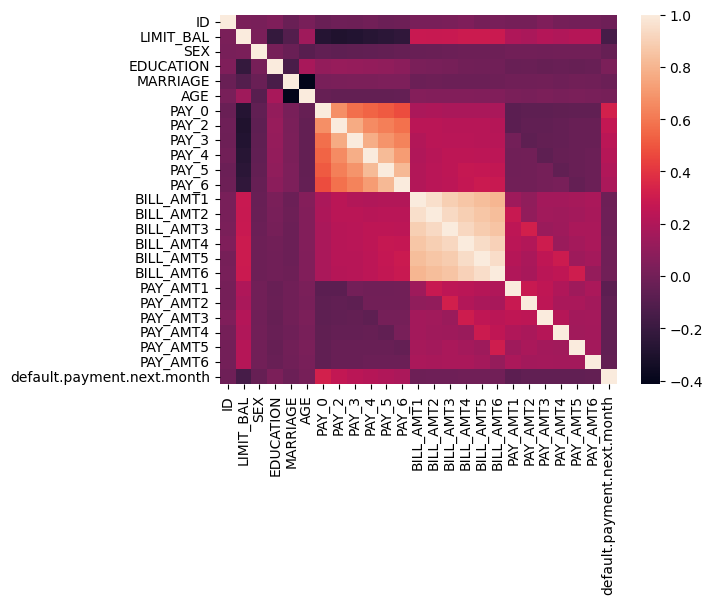

In [16]:
sns.heatmap(df.corr())

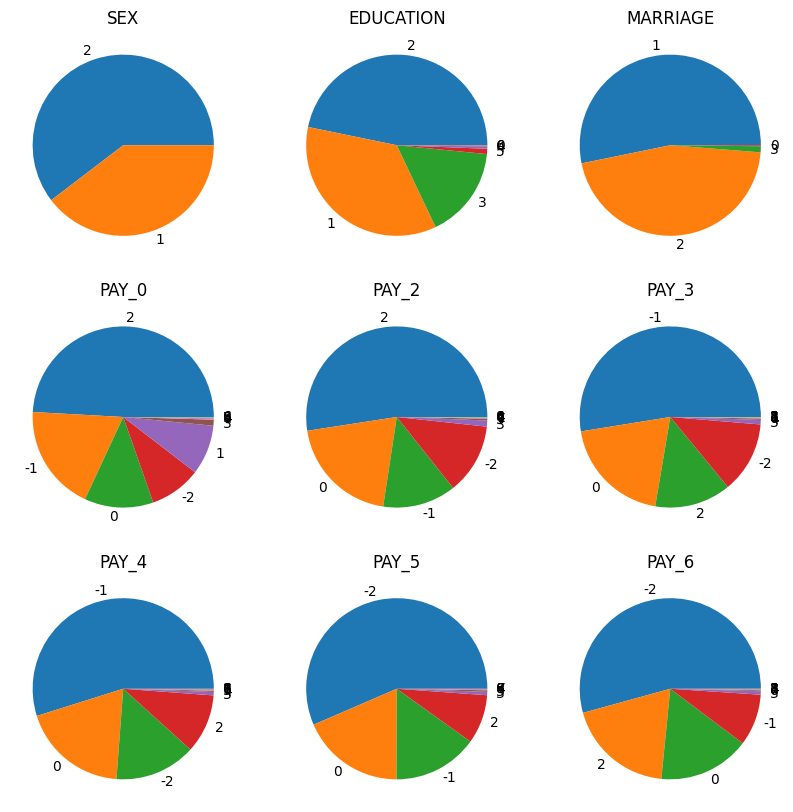

In [17]:
fig, axes = plt.subplots(3,3,figsize=(10, 10), sharey=True)
cat_list=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for j,i in enumerate(cat_list):
  axes[j//3,j%3].pie(df[i].value_counts(),labels=df[i].unique())
  axes[j//3,j%3].set_title(i)
plt.show()

In [18]:
def age(x):
  if x<32:
    return 'Young'
  elif x<50:
    return 'Middle Age'
  else:
    return 'Old'
a=pd.DataFrame(df['AGE'].apply(age))

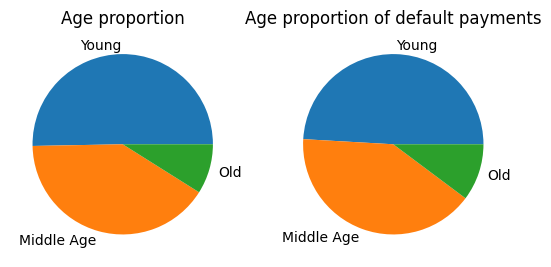

In [19]:
fig,ax=plt.subplots(1,2)
ax[0].pie(a['AGE'].value_counts(),labels=a['AGE'].unique())
ax[0].set_title('Age proportion')
ax[1].pie(a[df['default.payment.next.month']==1]['AGE'].value_counts(),labels=a['AGE'].unique())
plt.title('Age proportion of default payments')
plt.show()

In [20]:
df['AGE']=a['AGE']
df['AGE']

0             Young
1             Young
2        Middle Age
3        Middle Age
4               Old
            ...    
29995    Middle Age
29996    Middle Age
29997    Middle Age
29998    Middle Age
29999    Middle Age
Name: AGE, Length: 30000, dtype: object

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


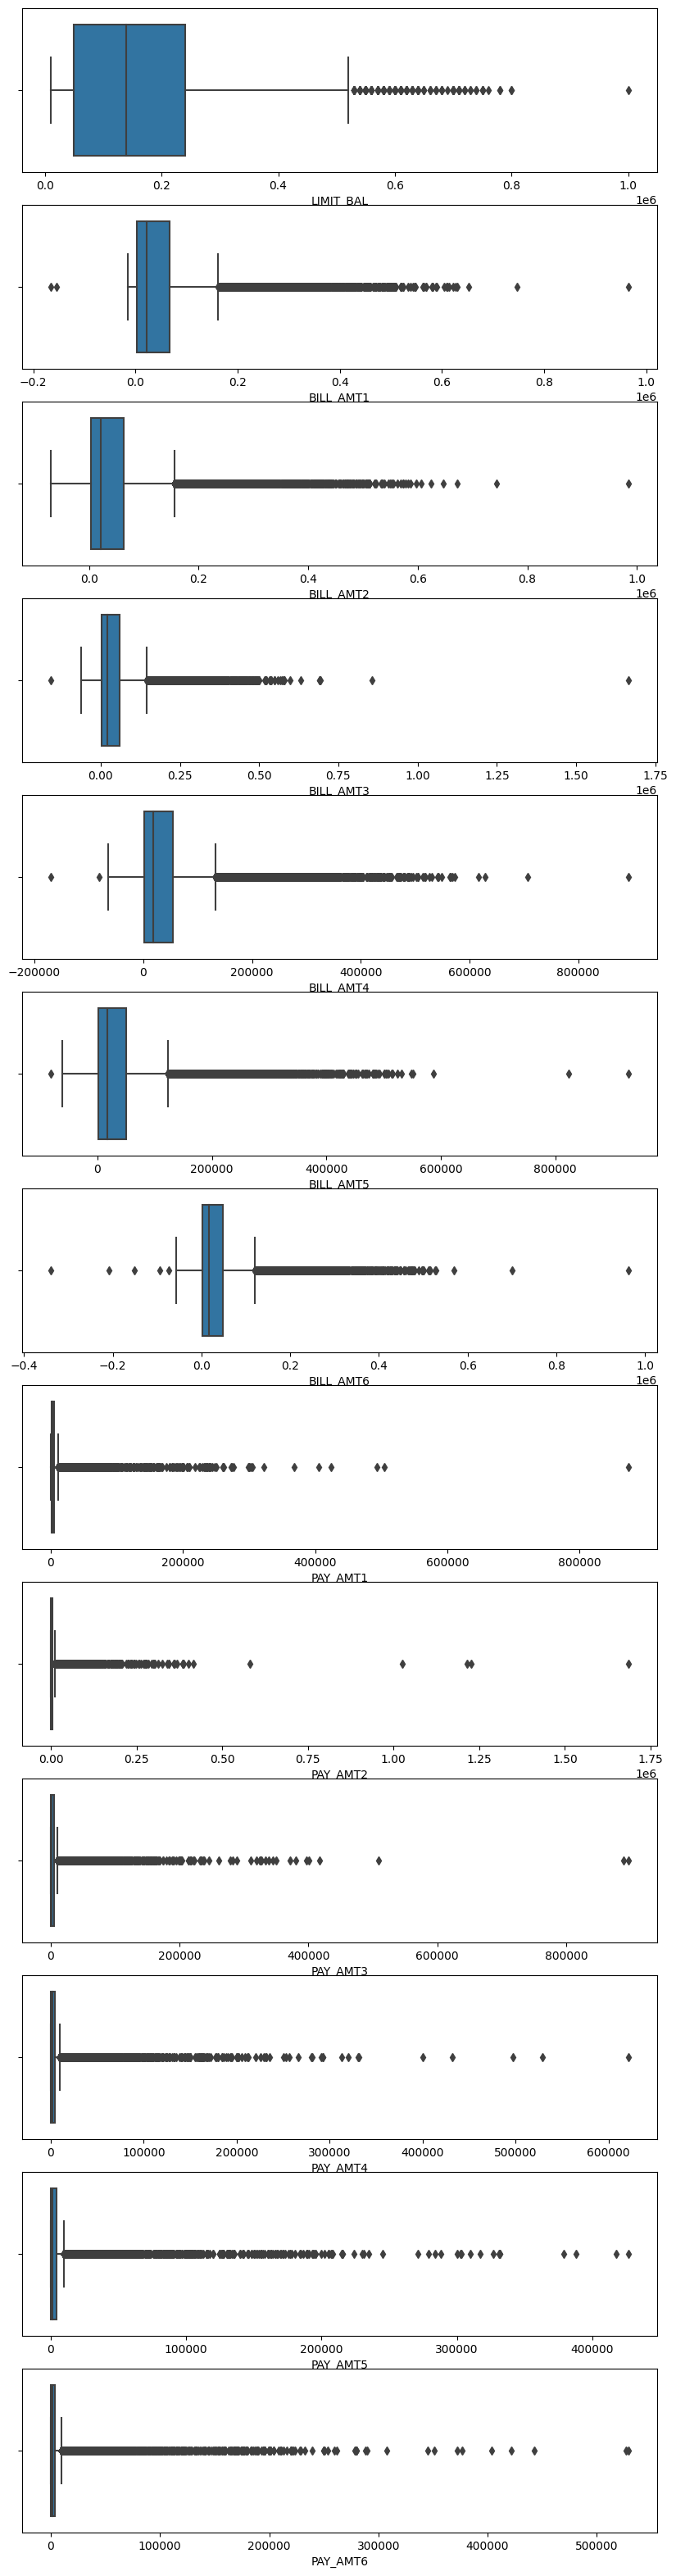

In [21]:
num_list=['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
fig,axes=plt.subplots(len(num_list),1,figsize=(10,40))
j=0
print(axes)
for i in num_list:
  sns.boxplot(x=df[i],ax=axes[j])
  # axes[j].set_title(i)
  j+=1
plt.show()

data Preprocessing

In [22]:
cat_list=['SEX', 'EDUCATION','AGE', 'MARRIAGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
abc=pd.DataFrame()
for i in cat_list:
  col=[i+'_'+str(j) for j in df[i].unique()][1:]
  a=pd.get_dummies(df[i],drop_first=True)
  a.columns=col
  print(a)
  abc=pd.concat([abc,a],axis=1)
abc


       SEX_1
0          1
1          1
2          1
3          1
4          0
...      ...
29995      0
29996      0
29997      0
29998      0
29999      0

[30000 rows x 1 columns]
       EDUCATION_1  EDUCATION_3  EDUCATION_5  EDUCATION_4  EDUCATION_6  \
0                0            1            0            0            0   
1                0            1            0            0            0   
2                0            1            0            0            0   
3                0            1            0            0            0   
4                0            1            0            0            0   
...            ...          ...          ...          ...          ...   
29995            0            0            1            0            0   
29996            0            0            1            0            0   
29997            0            1            0            0            0   
29998            0            0            1            0            0   
2999

,SEX_1,EDUCATION_1,EDUCATION_3,EDUCATION_5,EDUCATION_4,EDUCATION_6,EDUCATION_0,AGE_Middle Age,AGE_Old,MARRIAGE_2,...,PAY_5_6,PAY_6_2,PAY_6_0,PAY_6_-1,PAY_6_3,PAY_6_6,PAY_6_4,PAY_6_7,PAY_6_8,PAY_6_5
0,1,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
29996,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
29997,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
29998,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [23]:
df1=df.copy()
df1=pd.concat([df1,abc],axis=1)
df1=df1.drop(columns=['SEX', 'EDUCATION','AGE', 'MARRIAGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
df1

,ID,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_6,PAY_6_2,PAY_6_0,PAY_6_-1,PAY_6_3,PAY_6_6,PAY_6_4,PAY_6_7,PAY_6_8,PAY_6_5
0,1,20000.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0,0,1,0,0,0,0,0,0,0
3,4,50000.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0,0,1,0,0,0,0,0,0,0
4,5,50000.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,...,0,0,1,0,0,0,0,0,0,0
29996,29997,150000.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,...,0,0,1,0,0,0,0,0,0,0
29997,29998,30000.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
29998,29999,80000.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,...,0,1,0,0,0,0,0,0,0,0


In [24]:
df1.columns

Index(['ID', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'SEX_1', 'EDUCATION_1', 'EDUCATION_3', 'EDUCATION_5', 'EDUCATION_4',
       'EDUCATION_6', 'EDUCATION_0', 'AGE_Middle Age', 'AGE_Old', 'MARRIAGE_2',
       'MARRIAGE_3', 'MARRIAGE_0', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_-2',
       'PAY_0_1', 'PAY_0_3', 'PAY_0_4', 'PAY_0_8', 'PAY_0_7', 'PAY_0_5',
       'PAY_0_6', 'PAY_2_0', 'PAY_2_-1', 'PAY_2_-2', 'PAY_2_3', 'PAY_2_5',
       'PAY_2_7', 'PAY_2_4', 'PAY_2_1', 'PAY_2_6', 'PAY_2_8', 'PAY_3_0',
       'PAY_3_2', 'PAY_3_-2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_6', 'PAY_3_7',
       'PAY_3_1', 'PAY_3_5', 'PAY_3_8', 'PAY_4_0', 'PAY_4_-2', 'PAY_4_2',
       'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_7', 'PAY_4_6', 'PAY_4_1',
       'PAY_4_8', 'PAY_5_0', 'PAY_5_-1', 'PAY_5_2', 'PAY_5_3', 'PAY_5_5',
       'PAY_5_4', 'PAY_5_7', 'PAY_5_8'

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2=pd.DataFrame(scaler.fit_transform(df1))
df2.columns=df1.columns

<Axes: >

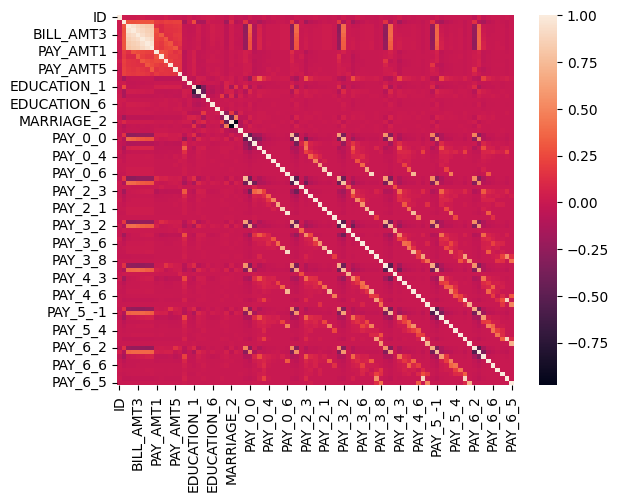

In [26]:
sns.heatmap(df2.corr())

In [27]:
from sklearn.model_selection import train_test_split
x=df2.drop(columns=['default.payment.next.month','ID',])
y=df2.loc[:,['default.payment.next.month']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
x_train.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_5_6,PAY_6_2,PAY_6_0,PAY_6_-1,PAY_6_3,PAY_6_6,PAY_6_4,PAY_6_7,PAY_6_8,PAY_6_5
22788,0.151515,0.289668,0.230053,0.178881,0.314916,0.241957,0.386245,0.017171,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29006,0.141414,0.146519,0.066271,0.086345,0.160138,0.080648,0.260979,0.000061,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16950,0.000000,0.155519,0.073955,0.090982,0.167737,0.088806,0.267434,0.000002,0.000761,0.001266,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22280,0.212121,0.329583,0.266501,0.204465,0.365974,0.211198,0.364221,0.010417,0.005344,0.008802,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11346,0.303030,0.146519,0.066220,0.086524,0.160445,0.080415,0.260798,0.000000,0.000194,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(x_train,y_train)
rm.score(x_test,y_test)



<ipython-input-84-a7a702eb4676>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rm.fit(x_train,y_train)


0.8118333333333333

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8163333333333334

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.7233333333333334

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8176666666666667

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
kn.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.794

In [29]:
from xgboost import XGBClassifier

model_xgb=XGBClassifier()
model_xgb.fit(x_train,y_train)
print(model_xgb.score(x_test,y_test))

0.8133333333333334


In [ ]:
from sklearn.metrics import classification_report
print('Logistic Regression\n',classification_report(y_test,lr.predict(x_test)))
print('Random Forest Classifier\n',classification_report(y_test,rm.predict(x_test)))
print('SVM\n',classification_report(y_test,svm.predict(x_test)))

Logistic Regression
               precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4673
         1.0       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000

Random Forest Classifier
               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4673
         1.0       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

SVM
               precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4673
         1.0       0.67      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.8